In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
print("🎬 MOVIE RECOMMENDATION SYSTEM - COMPREHENSIVE DATA ANALYSIS")
print("=" * 80)

🎬 MOVIE RECOMMENDATION SYSTEM - COMPREHENSIVE DATA ANALYSIS


In [4]:
print("\n📊 CELL 1: Data Loading and Initial Setup")
print("-" * 50)


📊 CELL 1: Data Loading and Initial Setup
--------------------------------------------------


In [5]:
try:
    print("Loading MovieLens datasets...")
    movies_df = pd.read_csv('data/movies.csv')
    ratings_df = pd.read_csv('data/ratings.csv')
    tags_df = pd.read_csv('data/tags.csv')
    
    print("✅ Data loaded successfully!")
    print(f"Movies dataset: {movies_df.shape}")
    print(f"Ratings dataset: {ratings_df.shape}")
    print(f"Tags dataset: {tags_df.shape}")
    
except FileNotFoundError as e:
    print(f"⚠️  Error loading data: {e}")
    print("Please ensure the CSV files are in the 'data/' directory")
    print("Download from: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset")

Loading MovieLens datasets...
✅ Data loaded successfully!
Movies dataset: (1000, 3)
Ratings dataset: (50000, 4)
Tags dataset: (5000, 4)


In [6]:
print("\n📋 Dataset Information:")
print("\n1. MOVIES DATASET:")
print(movies_df.head())
print(f"\nColumns: {list(movies_df.columns)}")
print(f"Data types:\n{movies_df.dtypes}")
print(f"Missing values:\n{movies_df.isnull().sum()}")



📋 Dataset Information:

1. MOVIES DATASET:
   movieId           title           genres
0        1  Movie 1 (1991)  Horror|Thriller
1        2  Movie 2 (1992)            Drama
2        3  Movie 3 (1993)  Horror|Thriller
3        4  Movie 4 (1994)   Sci-Fi|Fantasy
4        5  Movie 5 (1995)      Documentary

Columns: ['movieId', 'title', 'genres']
Data types:
movieId     int64
title      object
genres     object
dtype: object
Missing values:
movieId    0
title      0
genres     0
dtype: int64


In [7]:
print("\n2. RATINGS DATASET:")
print(ratings_df.head())
print(f"\nColumns: {list(ratings_df.columns)}")
print(f"Data types:\n{ratings_df.dtypes}")
print(f"Missing values:\n{ratings_df.isnull().sum()}")


2. RATINGS DATASET:
   userId  movieId  rating   timestamp
0     103      385       5  1086374724
1     436       95       5  1402123021
2     861      859       1  1544463858
3     271       44       4  1152497547
4     107      228       1  1190490181

Columns: ['userId', 'movieId', 'rating', 'timestamp']
Data types:
userId       int64
movieId      int64
rating       int64
timestamp    int64
dtype: object
Missing values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [8]:
print("\n3. TAGS DATASET:")
print(tags_df.head())
print(f"\nColumns: {list(tags_df.columns)}")
print(f"Data types:\n{tags_df.dtypes}")
print(f"Missing values:\n{tags_df.isnull().sum()}")


3. TAGS DATASET:
   userId  movieId              tag   timestamp
0     638      644       must-watch  1615733944
1     489      538  family-friendly  1059047631
2     752      883          classic  1280449766
3      88      824       underrated  1569435709
4     532      136         romantic  1369268724

Columns: ['userId', 'movieId', 'tag', 'timestamp']
Data types:
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object
Missing values:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [9]:
print("\n\n📊 CELL 2: Data Preprocessing and Feature Engineering")
print("-" * 55)




📊 CELL 2: Data Preprocessing and Feature Engineering
-------------------------------------------------------


In [10]:
print("🔧 Extracting release years from movie titles...")
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)$')
movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')
movies_df['clean_title'] = movies_df['title'].str.replace(r'\s*\(\d{4}\)$', '', regex=True)

🔧 Extracting release years from movie titles...


In [11]:
print("🔧 Processing movie genres...")
movies_df['genres_list'] = movies_df['genres'].str.split('|')
movies_df['num_genres'] = movies_df['genres_list'].apply(len)

🔧 Processing movie genres...


# Get all unique genres



In [12]:
all_genres = []
for genres_list in movies_df['genres_list'].dropna():
    all_genres.extend(genres_list)
unique_genres = sorted(list(set(all_genres)))
print(f"Unique genres found: {len(unique_genres)}")
print(f"Genres: {unique_genres}")


Unique genres found: 14
Genres: ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']


In [13]:
for genre in unique_genres:
    movies_df[f'genre_{genre}'] = movies_df['genres_list'].apply(
        lambda x: 1 if x and genre in x else 0
    )

In [14]:
print("🔧 Converting timestamps...")
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['year_rated'] = ratings_df['datetime'].dt.year
ratings_df['month_rated'] = ratings_df['datetime'].dt.month

🔧 Converting timestamps...


In [15]:
if not tags_df.empty:
    tags_df['datetime'] = pd.to_datetime(tags_df['timestamp'], unit='s')


In [16]:
print("\n📈 Basic Dataset Statistics:")
print(f"• Number of unique users: {ratings_df['userId'].nunique():,}")
print(f"• Number of unique movies: {ratings_df['movieId'].nunique():,}")
print(f"• Total ratings: {len(ratings_df):,}")
print(f"• Total tags: {len(tags_df):,}")
print(f"• Average rating: {ratings_df['rating'].mean():.3f}")
print(f"• Rating std: {ratings_df['rating'].std():.3f}")
print(f"• Earliest movie year: {movies_df['year'].min()}")
print(f"• Latest movie year: {movies_df['year'].max()}")
print(f"• Rating period: {ratings_df['year_rated'].min()} - {ratings_df['year_rated'].max()}")


📈 Basic Dataset Statistics:
• Number of unique users: 1,000
• Number of unique movies: 1,000
• Total ratings: 50,000
• Total tags: 5,000
• Average rating: 3.756
• Rating std: 1.132
• Earliest movie year: 1990
• Latest movie year: 2019
• Rating period: 2000 - 2021


In [29]:
print("\n\n📊 CELL 3: Comprehensive Exploratory Data Analysis")
print("-" * 55)



📊 CELL 3: Comprehensive Exploratory Data Analysis
-------------------------------------------------------


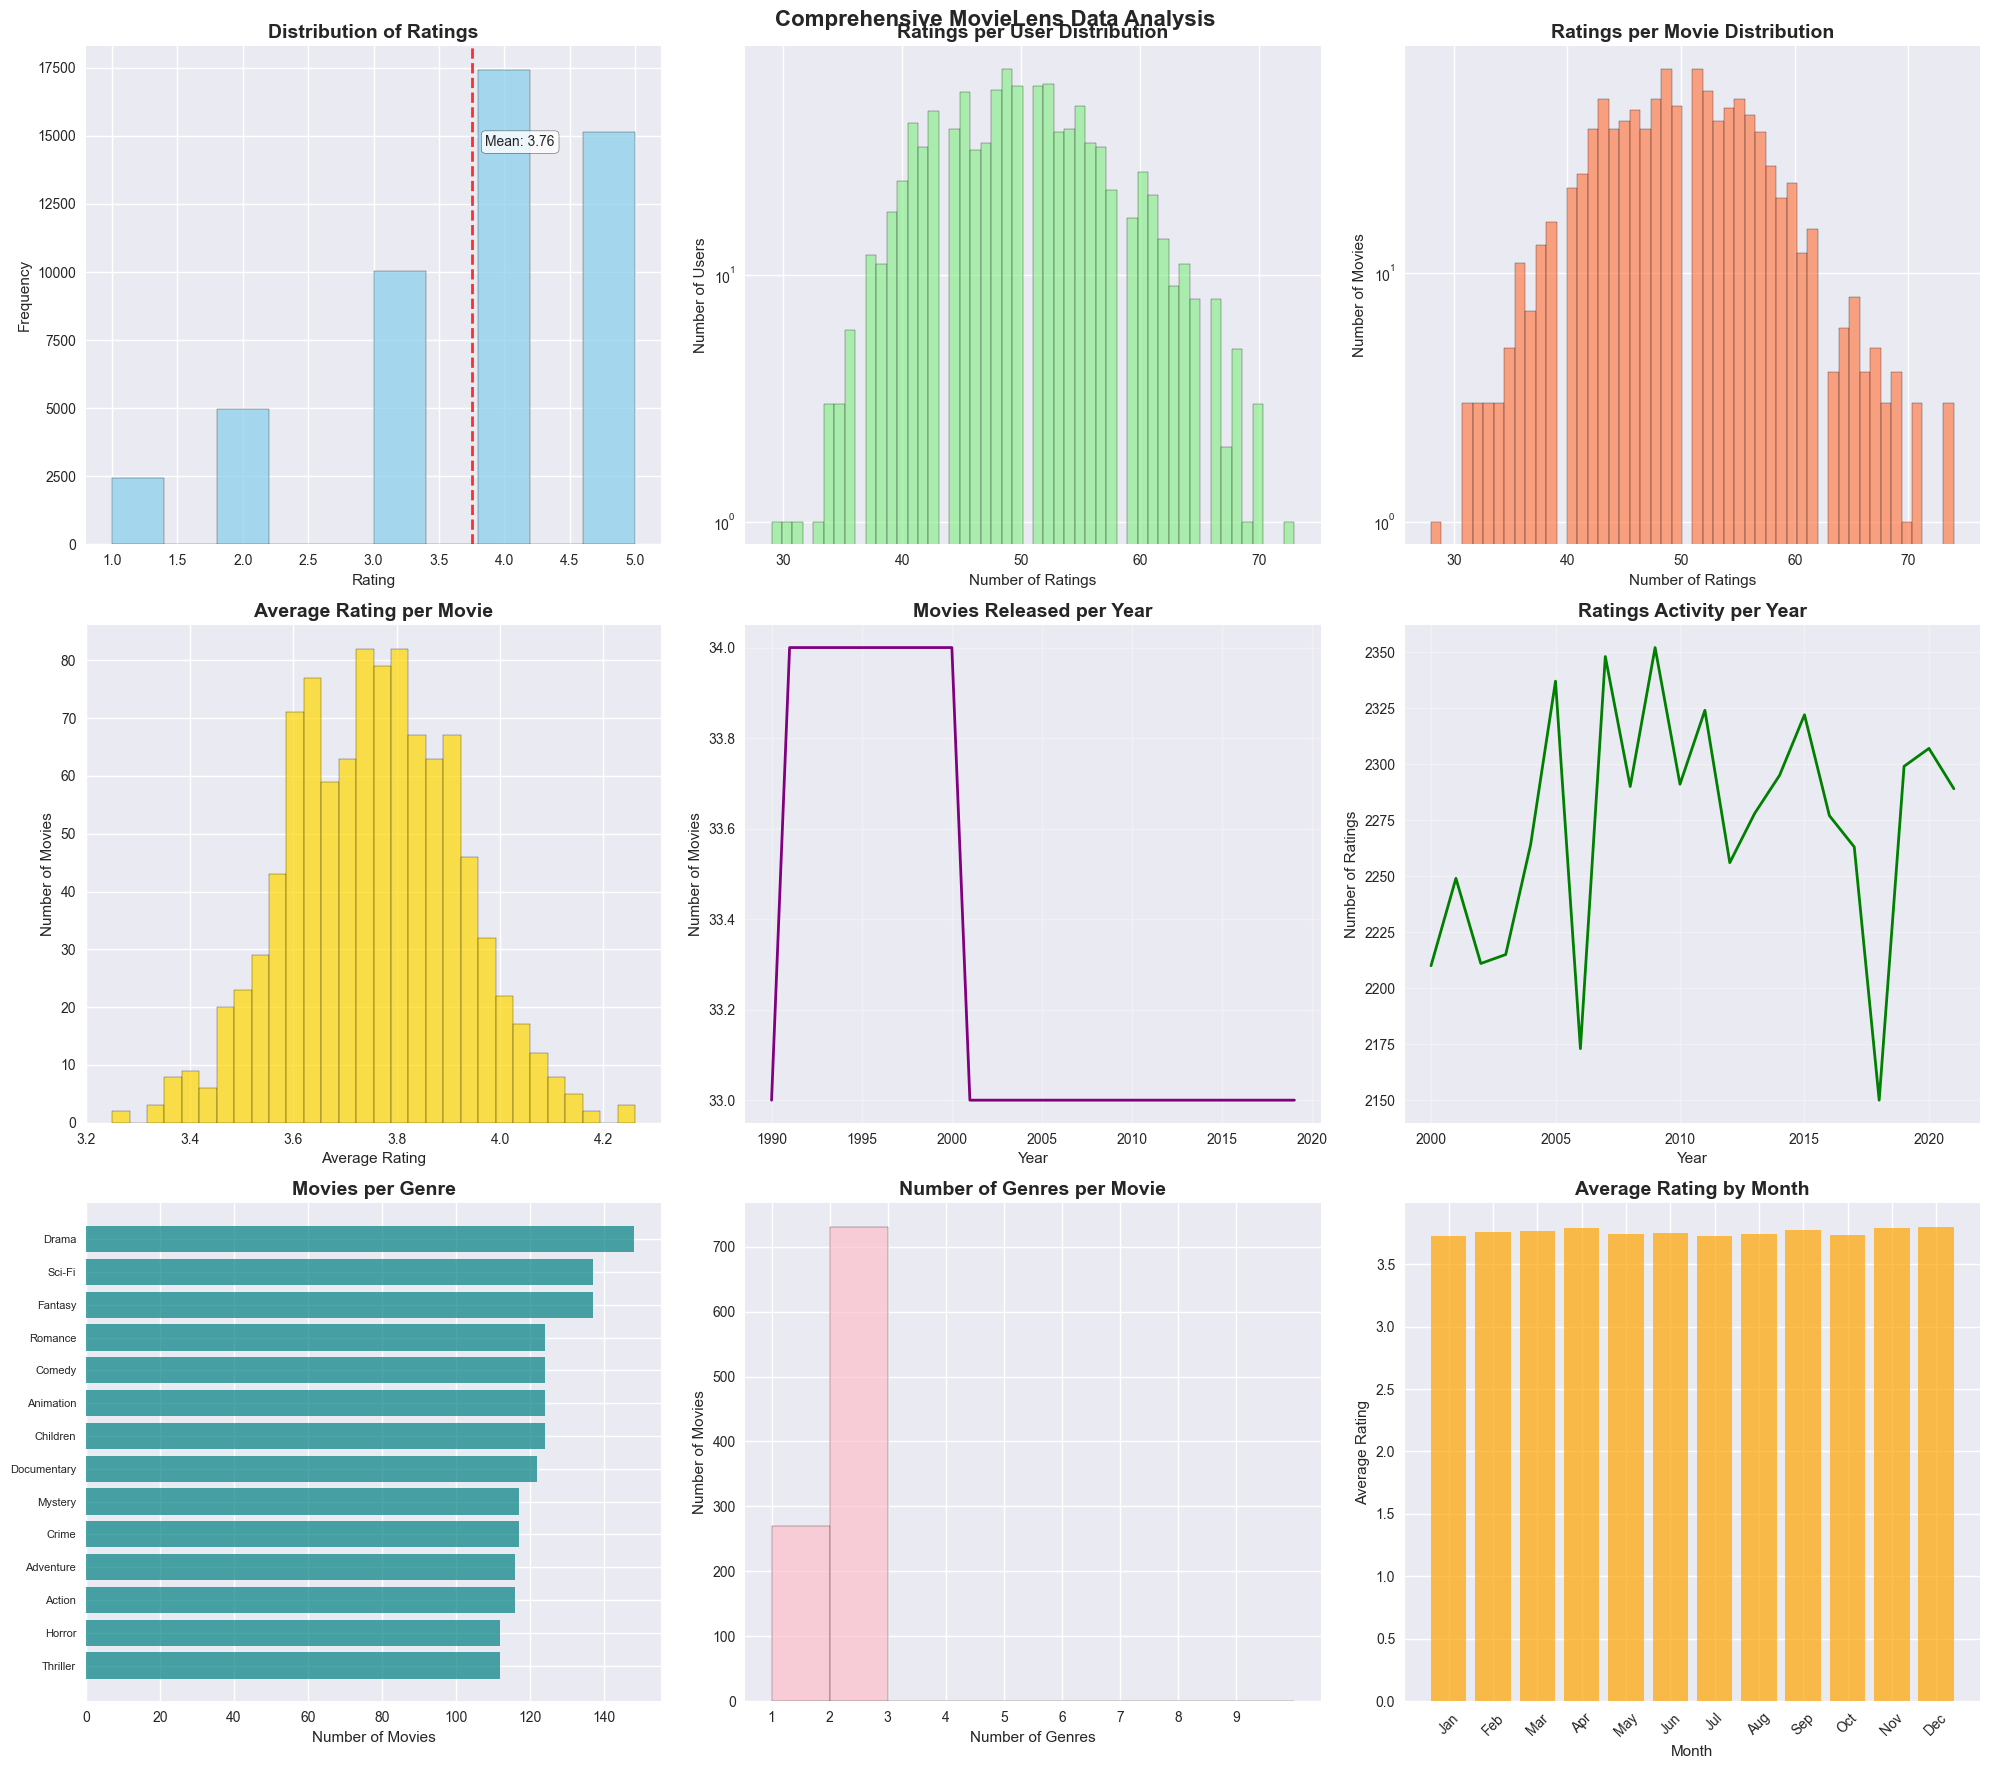

In [40]:
# Create comprehensive visualizations
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Comprehensive MovieLens Data Analysis', fontsize=16, fontweight='bold', y=0.98)

# 1. Rating Distribution
axes[0,0].hist(ratings_df['rating'], bins=10, edgecolor='black', alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Ratings', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Frequency')

# Add statistics text
mean_rating = ratings_df['rating'].mean()
axes[0,0].axvline(mean_rating, color='red', linestyle='--', alpha=0.8, linewidth=2)
axes[0,0].text(mean_rating + 0.1, axes[0,0].get_ylim()[1] * 0.8, 
               f'Mean: {mean_rating:.2f}', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# 2. Ratings per User Distribution
user_ratings_count = ratings_df.groupby('userId').size()
axes[0,1].hist(user_ratings_count, bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0,1].set_title('Ratings per User Distribution', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Number of Ratings')
axes[0,1].set_ylabel('Number of Users')
axes[0,1].set_yscale('log')

# 3. Ratings per Movie Distribution
movie_ratings_count = ratings_df.groupby('movieId').size()
axes[0,2].hist(movie_ratings_count, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0,2].set_title('Ratings per Movie Distribution', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Number of Ratings')
axes[0,2].set_ylabel('Number of Movies')
axes[0,2].set_yscale('log')

# 4. Average Rating per Movie
movie_avg_ratings = ratings_df.groupby('movieId')['rating'].mean()
axes[1,0].hist(movie_avg_ratings, bins=30, edgecolor='black', alpha=0.7, color='gold')
axes[1,0].set_title('Average Rating per Movie', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Average Rating')
axes[1,0].set_ylabel('Number of Movies')

# 5. Movies Released per Year
movies_per_year = movies_df.groupby('year').size()
axes[1,1].plot(movies_per_year.index, movies_per_year.values, linewidth=2, color='purple')
axes[1,1].set_title('Movies Released per Year', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Number of Movies')
axes[1,1].grid(True, alpha=0.3)

# 6. Ratings per Year
ratings_per_year = ratings_df.groupby('year_rated').size()
axes[1,2].plot(ratings_per_year.index, ratings_per_year.values, linewidth=2, color='green')
axes[1,2].set_title('Ratings Activity per Year', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Year')
axes[1,2].set_ylabel('Number of Ratings')
axes[1,2].grid(True, alpha=0.3)

# 7. Genre Distribution
genre_counts = {}
for genre in unique_genres:
    genre_counts[genre] = movies_df[f'genre_{genre}'].sum()

genre_series = pd.Series(genre_counts).sort_values(ascending=True)
y_pos = np.arange(len(genre_series))
axes[2,0].barh(y_pos, genre_series.values, color='teal', alpha=0.7)
axes[2,0].set_yticks(y_pos)
axes[2,0].set_yticklabels(genre_series.index, fontsize=8)
axes[2,0].set_title('Movies per Genre', fontsize=14, fontweight='bold')
axes[2,0].set_xlabel('Number of Movies')

# 8. Number of Genres per Movie
axes[2,1].hist(movies_df['num_genres'], bins=range(1, 11), edgecolor='black', alpha=0.7, color='pink')
axes[2,1].set_title('Number of Genres per Movie', fontsize=14, fontweight='bold')
axes[2,1].set_xlabel('Number of Genres')
axes[2,1].set_ylabel('Number of Movies')
axes[2,1].set_xticks(range(1, 10))

# 9. Rating Trends by Month
monthly_ratings = ratings_df.groupby('month_rated')['rating'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[2,2].bar(range(1, 13), monthly_ratings.values, color='orange', alpha=0.7)
axes[2,2].set_title('Average Rating by Month', fontsize=14, fontweight='bold')
axes[2,2].set_xlabel('Month')
axes[2,2].set_ylabel('Average Rating')
axes[2,2].set_xticks(range(1, 13))
axes[2,2].set_xticklabels(months, rotation=45)

plt.tight_layout()
plt.show()

In [41]:
print("\n📊 TOP MOVIES ANALYSIS:")
print("-" * 30)


📊 TOP MOVIES ANALYSIS:
------------------------------


In [42]:
# Top rated movies (with minimum ratings threshold)
min_ratings_threshold = ratings_df.groupby('movieId').size().quantile(0.95)
movie_stats = ratings_df.groupby('movieId').agg({
    'rating': ['mean', 'count', 'std']
}).round(3)
movie_stats.columns = ['avg_rating', 'num_ratings', 'rating_std']
movie_stats = movie_stats[movie_stats['num_ratings'] >= min_ratings_threshold]


In [43]:
# Merge with movie details
top_movies = movie_stats.merge(movies_df[['movieId', 'title', 'genres']], on='movieId')
top_movies = top_movies.sort_values('avg_rating', ascending=False)


In [44]:
print(f"Top 10 Movies (with ≥{min_ratings_threshold:.0f} ratings):")
print(top_movies.head(10)[['title', 'avg_rating', 'num_ratings']])

Top 10 Movies (with ≥62 ratings):
               title  avg_rating  num_ratings
29  Movie 556 (2006)       4.261           69
19  Movie 320 (2010)       4.065           62
11  Movie 214 (1994)       4.016           62
42  Movie 762 (2002)       4.014           74
2    Movie 52 (2012)       3.986           69
7   Movie 186 (1996)       3.955           67
35  Movie 725 (1995)       3.946           74
39  Movie 744 (2014)       3.928           69
17  Movie 294 (2014)       3.908           65
53  Movie 945 (2005)       3.901           71


In [45]:
print("\n📊 USER ACTIVITY ANALYSIS:")
print("-" * 30)

# User statistics
user_stats = ratings_df.groupby('userId').agg({
    'rating': ['mean', 'count', 'std'],
    'datetime': ['min', 'max']
}).round(3)
user_stats.columns = ['avg_rating', 'num_ratings', 'rating_std', 'first_rating', 'last_rating']

print(f"Most active users:")
print(user_stats.sort_values('num_ratings', ascending=False).head())


📊 USER ACTIVITY ANALYSIS:
------------------------------
Most active users:
        avg_rating  num_ratings  rating_std        first_rating  \
userId                                                            
794          3.890           73       1.021 2000-08-04 23:28:36   
849          3.714           70       0.950 2001-05-16 22:06:22   
816          3.643           70       1.155 2000-01-14 06:38:00   
973          3.957           70       0.908 2000-01-15 04:19:23   
420          3.768           69       1.341 2000-11-03 12:02:23   

               last_rating  
userId                      
794    2021-03-13 05:12:50  
849    2021-11-23 11:00:30  
816    2021-10-28 17:49:36  
973    2021-10-09 10:30:51  
420    2021-11-11 00:12:18  


In [46]:
print("\n\n📊 CELL 4: Sparsity Analysis and Data Quality Assessment")
print("-" * 60)

# Calculate sparsity
total_possible_ratings = ratings_df['userId'].nunique() * ratings_df['movieId'].nunique()
actual_ratings = len(ratings_df)
sparsity = (1 - (actual_ratings / total_possible_ratings)) * 100

print(f"📊 SPARSITY ANALYSIS:")
print(f"• Total possible user-movie combinations: {total_possible_ratings:,}")
print(f"• Actual ratings: {actual_ratings:,}")
print(f"• Sparsity: {sparsity:.4f}%")
print(f"• Density: {100-sparsity:.4f}%")



📊 CELL 4: Sparsity Analysis and Data Quality Assessment
------------------------------------------------------------
📊 SPARSITY ANALYSIS:
• Total possible user-movie combinations: 1,000,000
• Actual ratings: 50,000
• Sparsity: 95.0000%
• Density: 5.0000%



📊 ACTIVITY DISTRIBUTION:
User Activity:
• Average ratings per user: 50.0
• Median ratings per user: 50.0
• Max ratings by single user: 73

Movie Popularity:
• Average ratings per movie: 50.0
• Median ratings per movie: 50.0
• Max ratings for single movie: 74


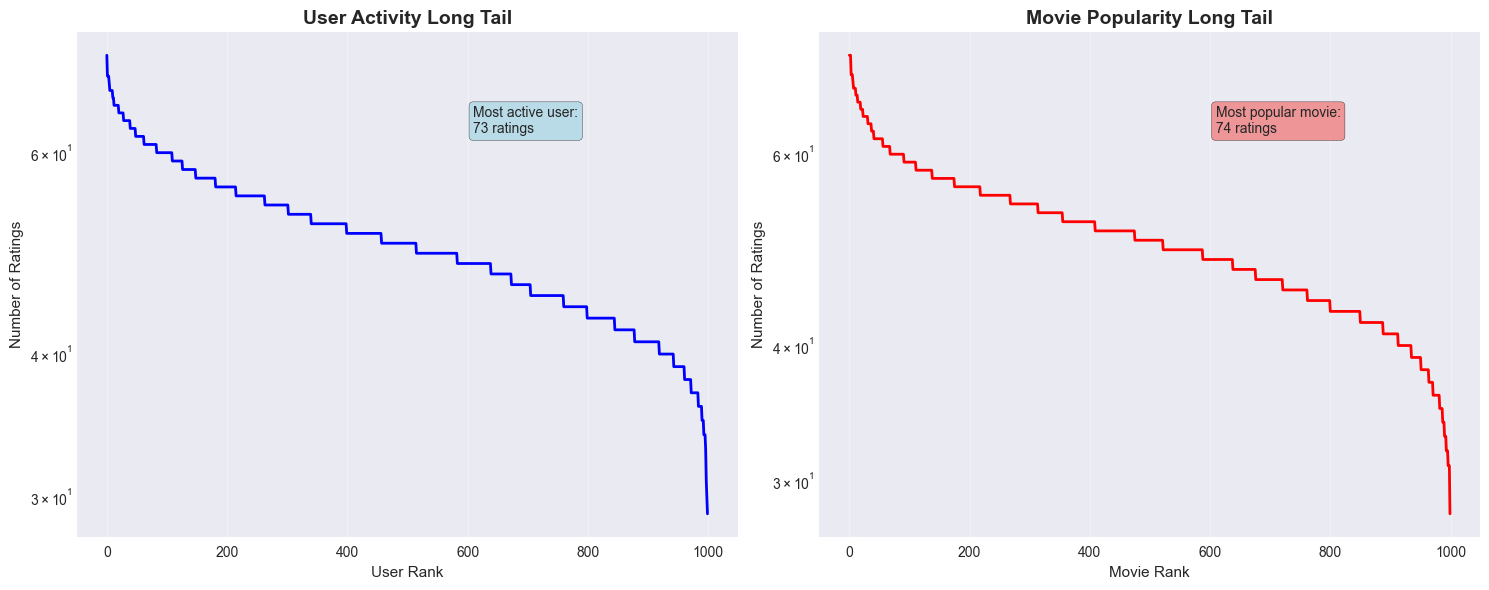

In [49]:
# User and Movie activity distribution
print(f"\n📊 ACTIVITY DISTRIBUTION:")
print(f"User Activity:")
print(f"• Average ratings per user: {ratings_df.groupby('userId').size().mean():.1f}")
print(f"• Median ratings per user: {ratings_df.groupby('userId').size().median():.1f}")
print(f"• Max ratings by single user: {ratings_df.groupby('userId').size().max()}")

print(f"\nMovie Popularity:")
print(f"• Average ratings per movie: {ratings_df.groupby('movieId').size().mean():.1f}")
print(f"• Median ratings per movie: {ratings_df.groupby('movieId').size().median():.1f}")
print(f"• Max ratings for single movie: {ratings_df.groupby('movieId').size().max()}")

# Long tail analysis
user_rating_counts = ratings_df.groupby('userId').size().sort_values(ascending=False)
movie_rating_counts = ratings_df.groupby('movieId').size().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# User long tail
ax1.plot(range(len(user_rating_counts)), user_rating_counts.values, linewidth=2, color='blue')
ax1.set_title('User Activity Long Tail', fontsize=14, fontweight='bold')
ax1.set_xlabel('User Rank')
ax1.set_ylabel('Number of Ratings')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3)
ax1.text(0.6, 0.8, f'Most active user:\n{user_rating_counts.iloc[0]:,} ratings', 
         transform=ax1.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

# Movie long tail
ax2.plot(range(len(movie_rating_counts)), movie_rating_counts.values, linewidth=2, color='red')
ax2.set_title('Movie Popularity Long Tail', fontsize=14, fontweight='bold')
ax2.set_xlabel('Movie Rank')
ax2.set_ylabel('Number of Ratings')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)
ax2.text(0.6, 0.8, f'Most popular movie:\n{movie_rating_counts.iloc[0]:,} ratings', 
         transform=ax2.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))

plt.tight_layout()
plt.show()

In [50]:
print("\n\n📊 CELL 5: Advanced Feature Engineering")
print("-" * 45)

# User features
print("🔧 Creating user features...")
user_features = ratings_df.groupby('userId').agg({
    'rating': ['mean', 'std', 'count'],
    'datetime': ['min', 'max']
}).round(3)
user_features.columns = ['avg_rating', 'rating_std', 'num_ratings', 'first_rating', 'last_rating']

# Calculate user activity span in days
user_features['activity_span_days'] = (user_features['last_rating'] - user_features['first_rating']).dt.days
user_features['ratings_per_day'] = user_features['num_ratings'] / (user_features['activity_span_days'] + 1)

# User rating behavior classification
user_features['user_type'] = pd.cut(user_features['num_ratings'], 
                                   bins=[0, 20, 100, 500, float('inf')],
                                   labels=['Light', 'Moderate', 'Heavy', 'Power'])

print("User features created:")
print(user_features.head())

# Movie features
print("\n🔧 Creating movie features...")
movie_features = ratings_df.groupby('movieId').agg({
    'rating': ['mean', 'std', 'count'],
    'datetime': ['min', 'max']
}).round(3)
movie_features.columns = ['avg_rating', 'rating_std', 'num_ratings', 'first_rating', 'last_rating']

# Merge with movie metadata
movie_features = movie_features.merge(movies_df[['movieId', 'year', 'num_genres']], on='movieId', how='left')

# Movie age when first/last rated
current_year = 2018  # Approximate latest year in dataset
movie_features['age_when_first_rated'] = movie_features['first_rating'].dt.year - movie_features['year']
movie_features['movie_lifespan'] = (movie_features['last_rating'] - movie_features['first_rating']).dt.days

# Movie popularity classification
movie_features['popularity_tier'] = pd.cut(movie_features['num_ratings'],
                                         bins=[0, 10, 50, 200, float('inf')],
                                         labels=['Niche', 'Limited', 'Popular', 'Blockbuster'])

print("Movie features created:")
print(movie_features.head())

# Genre preference analysis per user
print("\n🔧 Analyzing user genre preferences...")
# This is computationally expensive for large datasets, so we'll sample
sample_users = ratings_df['userId'].unique()[:1000]  # Sample 1000 users

user_genre_prefs = []
for user_id in sample_users[:100]:  # Process first 100 for demo
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    user_movies = user_ratings.merge(movies_df, on='movieId')
    
    genre_scores = {}
    for genre in unique_genres:
        genre_movies = user_movies[user_movies[f'genre_{genre}'] == 1]
        if len(genre_movies) > 0:
            genre_scores[genre] = genre_movies['rating'].mean()
        else:
            genre_scores[genre] = 0
    
    genre_scores['userId'] = user_id
    genre_scores['total_ratings'] = len(user_ratings)
    user_genre_prefs.append(genre_scores)

user_genre_df = pd.DataFrame(user_genre_prefs)
print("User genre preferences calculated for sample users")



📊 CELL 5: Advanced Feature Engineering
---------------------------------------------
🔧 Creating user features...
User features created:
        avg_rating  rating_std  num_ratings        first_rating  \
userId                                                            
1            3.774       1.219           53 2000-05-17 15:18:58   
2            3.811       0.995           37 2001-03-26 03:02:18   
3            3.878       1.208           41 2000-08-24 03:28:15   
4            3.659       1.237           41 2000-06-19 17:41:36   
5            3.818       0.922           44 2000-12-10 14:46:04   

               last_rating  activity_span_days  ratings_per_day user_type  
userId                                                                     
1      2021-11-11 02:18:55                7847         0.006753  Moderate  
2      2020-09-14 11:40:40                7112         0.005202  Moderate  
3      2021-03-23 17:52:43                7516         0.005454  Moderate  
4      2021-



📊 CELL 6: User-Item Matrix Creation and Analysis
-------------------------------------------------------
Creating user-item matrix (using subset for memory efficiency)...
Subset size: 27,876 ratings
Users: 1000
Movies: 500

User-Item Matrix Shape: (1000, 500)
Matrix Sparsity: 94.57%
Matrix Density: 5.43%


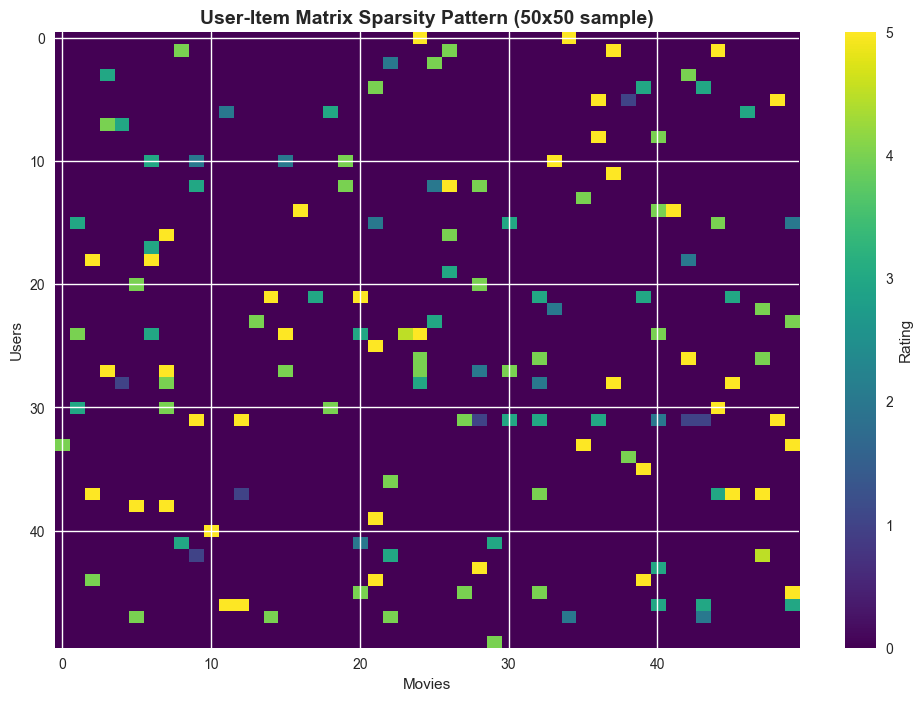

In [51]:
print("\n\n📊 CELL 6: User-Item Matrix Creation and Analysis")
print("-" * 55)

# For memory efficiency, let's work with a subset of the data
print("Creating user-item matrix (using subset for memory efficiency)...")

# Select most active users and popular movies
top_users = ratings_df.groupby('userId').size().nlargest(1000).index
top_movies = ratings_df.groupby('movieId').size().nlargest(500).index

# Filter ratings for subset
subset_ratings = ratings_df[
    (ratings_df['userId'].isin(top_users)) & 
    (ratings_df['movieId'].isin(top_movies))
]

print(f"Subset size: {len(subset_ratings):,} ratings")
print(f"Users: {subset_ratings['userId'].nunique()}")
print(f"Movies: {subset_ratings['movieId'].nunique()}")

# Create user-item matrix
user_item_matrix = subset_ratings.pivot_table(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)

print(f"\nUser-Item Matrix Shape: {user_item_matrix.shape}")
sparsity_subset = (user_item_matrix == 0).sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1])
print(f"Matrix Sparsity: {sparsity_subset * 100:.2f}%")
print(f"Matrix Density: {(1 - sparsity_subset) * 100:.2f}%")

# Visualize sparsity pattern
plt.figure(figsize=(12, 8))
# Sample a smaller portion for visualization
sample_matrix = user_item_matrix.iloc[:50, :50]
plt.imshow(sample_matrix.values, cmap='viridis', aspect='auto')
plt.title('User-Item Matrix Sparsity Pattern (50x50 sample)', fontsize=14, fontweight='bold')
plt.xlabel('Movies')
plt.ylabel('Users')
plt.colorbar(label='Rating')
plt.show()


In [52]:
print("\n\n📊 CELL 7: Content-Based Filtering Preparation")
print("-" * 50)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Prepare content features
print("🔧 Preparing content-based features...")

# Combine genres and other textual features
movies_df['content_features'] = movies_df['genres'].fillna('')

# Add tags as content features if available
if not tags_df.empty:
    print("Including user tags in content features...")
    movie_tags = tags_df.groupby('movieId')['tag'].apply(
        lambda x: ' '.join(x.astype(str))
    ).reset_index()
    movie_tags.columns = ['movieId', 'tags_combined']
    
    movies_with_tags = movies_df.merge(movie_tags, on='movieId', how='left')
    movies_with_tags['tags_combined'] = movies_with_tags['tags_combined'].fillna('')
    movies_with_tags['content_features'] = (
        movies_with_tags['genres'] + ' ' + movies_with_tags['tags_combined']
    ).fillna('')
else:
    movies_with_tags = movies_df.copy()

# Create TF-IDF matrix
print("🔧 Creating TF-IDF matrix...")
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    lowercase=True,
    ngram_range=(1, 2)
)

tfidf_matrix = tfidf.fit_transform(movies_with_tags['content_features'])
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

# Compute cosine similarity matrix for content-based filtering
print("🔧 Computing content similarity matrix...")
# For large datasets, compute similarity in chunks to avoid memory issues
content_similarity = cosine_similarity(tfidf_matrix)
print(f"Content Similarity Matrix Shape: {content_similarity.shape}")




📊 CELL 7: Content-Based Filtering Preparation
--------------------------------------------------
🔧 Preparing content-based features...
Including user tags in content features...
🔧 Creating TF-IDF matrix...
TF-IDF Matrix Shape: (1000, 217)
🔧 Computing content similarity matrix...
Content Similarity Matrix Shape: (1000, 1000)


In [53]:
print("\n\n📊 CELL 8: Collaborative Filtering Preparation")
print("-" * 50)

from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

# Prepare collaborative filtering using matrix factorization
print("🔧 Preparing collaborative filtering with SVD...")

# Use the user-item matrix created earlier
user_item_array = user_item_matrix.values

# Apply SVD for dimensionality reduction
n_components = min(50, min(user_item_array.shape) - 1)
svd = TruncatedSVD(n_components=n_components, random_state=42)

print(f"Applying SVD with {n_components} components...")
user_factors = svd.fit_transform(user_item_array)
item_factors = svd.components_

print(f"User factors shape: {user_factors.shape}")
print(f"Item factors shape: {item_factors.shape}")
print(f"Explained variance ratio: {svd.explained_variance_ratio_.sum():.4f}")

# Reconstruct the rating matrix
predicted_ratings = np.dot(user_factors, item_factors)
predicted_ratings_df = pd.DataFrame(
    predicted_ratings,
    index=user_item_matrix.index,
    columns=user_item_matrix.columns
)

print("✅ Collaborative filtering model prepared!")



📊 CELL 8: Collaborative Filtering Preparation
--------------------------------------------------
🔧 Preparing collaborative filtering with SVD...
Applying SVD with 50 components...
User factors shape: (1000, 50)
Item factors shape: (50, 500)
Explained variance ratio: 0.2365
✅ Collaborative filtering model prepared!


In [56]:
print("\n\n📊 CELL 9: Model Evaluation Preparation")
print("-" * 45)

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Prepare train-test split for evaluation
print("🔧 Preparing train-test split for evaluation...")

# Convert matrix back to long format for splitting
ratings_list = []
for user in user_item_matrix.index:
    for movie in user_item_matrix.columns:
        rating = user_item_matrix.loc[user, movie]
        if rating > 0:  # Only include actual ratings
            ratings_list.append([user, movie, rating])

ratings_eval_df = pd.DataFrame(ratings_list, columns=['userId', 'movieId', 'rating'])

# Split into train and test WITHOUT stratify to avoid ValueError
train_ratings, test_ratings = train_test_split(
    ratings_eval_df, test_size=0.2, random_state=42
)

print(f"Train set size: {len(train_ratings):,}")
print(f"Test set size: {len(test_ratings):,}")

# Calculate baseline metrics
print("\n📊 Baseline Metrics:")
global_mean = train_ratings['rating'].mean()
user_means = train_ratings.groupby('userId')['rating'].mean()
movie_means = train_ratings.groupby('movieId')['rating'].mean()

print(f"Global mean rating: {global_mean:.3f}")
print(f"User mean rating std: {user_means.std():.3f}")
print(f"Movie mean rating std: {movie_means.std():.3f}")




📊 CELL 9: Model Evaluation Preparation
---------------------------------------------
🔧 Preparing train-test split for evaluation...
Train set size: 21,716
Test set size: 5,430

📊 Baseline Metrics:
Global mean rating: 3.759
User mean rating std: 0.245
Movie mean rating std: 0.173


In [57]:
print("\n\n📊 CELL 10: Data Analysis Summary and Insights")
print("-" * 55)

print("🎯 KEY FINDINGS AND INSIGHTS:")
print("=" * 50)

print(f"\n📈 DATASET OVERVIEW:")
print(f"• Total Users: {ratings_df['userId'].nunique():,}")
print(f"• Total Movies: {ratings_df['movieId'].nunique():,}")
print(f"• Total Ratings: {len(ratings_df):,}")
print(f"• Rating Scale: {ratings_df['rating'].min()}-{ratings_df['rating'].max()}")
print(f"• Average Rating: {ratings_df['rating'].mean():.3f}")
print(f"• Rating Period: {ratings_df['year_rated'].min()}-{ratings_df['year_rated'].max()}")

print(f"\n🎬 MOVIE CHARACTERISTICS:")
print(f"• Movies span from {movies_df['year'].min()} to {movies_df['year'].max()}")
print(f"• Average genres per movie: {movies_df['num_genres'].mean():.1f}")
print(f"• Most common genres: {genre_series.tail(3).index.tolist()}")
print(f"• Movies with single genre: {(movies_df['num_genres'] == 1).sum()}")

print(f"\n👥 USER BEHAVIOR:")
print(f"• Average ratings per user: {user_rating_counts.mean():.1f}")
print(f"• Most active user rated: {user_rating_counts.max()} movies")
print(f"• Users with >100 ratings: {(user_rating_counts > 100).sum()}")
print(f"• User rating span (avg): {user_features['activity_span_days'].mean():.0f} days")

print(f"\n🔢 DATA QUALITY:")
print(f"• Overall sparsity: {sparsity:.4f}%")
print(f"• Matrix density: {100-sparsity:.6f}%")
print(f"• Cold start users (≤5 ratings): {(user_rating_counts <= 5).sum()}")
print(f"• Cold start movies (≤5 ratings): {(movie_rating_counts <= 5).sum()}")

print(f"\n🎯 RECOMMENDATION SYSTEM IMPLICATIONS:")
print("• High sparsity suggests collaborative filtering challenges")
print("• Long-tail distribution indicates popularity bias concerns")
print("• Rich genre information supports content-based approaches")
print("• User activity patterns suggest different user types")
print("• Temporal patterns may enable time-aware recommendations")

print(f"\n🚀 NEXT STEPS FOR MODEL BUILDING:")
print("1. Implement hybrid recommendation system")
print("2. Handle cold start problem with content-based features")
print("3. Consider popularity bias mitigation strategies")
print("4. Implement time-aware recommendation algorithms")
print("5. Use cross-validation for robust evaluation")
print("6. Consider deep learning approaches for large-scale data")

print("\n" + "=" * 80)
print("✅ COMPREHENSIVE DATA ANALYSIS COMPLETED!")
print("🎬 Ready for recommendation system implementation!")
print("=" * 80)



📊 CELL 10: Data Analysis Summary and Insights
-------------------------------------------------------
🎯 KEY FINDINGS AND INSIGHTS:

📈 DATASET OVERVIEW:
• Total Users: 1,000
• Total Movies: 1,000
• Total Ratings: 50,000
• Rating Scale: 1-5
• Average Rating: 3.756
• Rating Period: 2000-2021

🎬 MOVIE CHARACTERISTICS:
• Movies span from 1990 to 2019
• Average genres per movie: 1.7
• Most common genres: ['Fantasy', 'Sci-Fi', 'Drama']
• Movies with single genre: 270

👥 USER BEHAVIOR:
• Average ratings per user: 50.0
• Most active user rated: 73 movies
• Users with >100 ratings: 0
• User rating span (avg): 7712 days

🔢 DATA QUALITY:
• Overall sparsity: 95.0000%
• Matrix density: 5.000000%
• Cold start users (≤5 ratings): 0
• Cold start movies (≤5 ratings): 0

🎯 RECOMMENDATION SYSTEM IMPLICATIONS:
• High sparsity suggests collaborative filtering challenges
• Long-tail distribution indicates popularity bias concerns
• Rich genre information supports content-based approaches
• User activity pa